# Flower Classification with PyTorch

In [1]:
# Import required libraries
import os
import json
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import numpy as np
import torch.nn.functional as F
import torch.utils.data
import pandas as pd
from torch import nn
from torch import optim
from torchvision import datasets, models, transforms
from collections import OrderedDict
from google.colab import drive
from PIL import Image

# Set plotting parameters for inline visualization
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Data Loading Setup for Image Classification

The following part initializes and sets up the data loading process for a deep learning project, likely for image classification using the Oxford-102 dataset. Here's a breakdown:

1. **Mounting Google Drive**: This line mounts Google Drive to access the dataset stored there. It ensures access to the data stored in Google Drive and facilitates reading and writing files from and to Google Drive.

2. **Defining Dataset Directories**: Three directories are defined, namely `train_dir`, `valid_dir`, and `test_dir`, each pointing to their respective locations in the Google Drive where the training, validation, and test datasets are stored.

3. **Printing File Information**: The code prints the list of files in each directory to ensure that the correct directories are accessed.

4. **Defining Data Transforms**: Data transforms are defined using `torchvision.transforms.Compose`. These transforms include resizing, cropping, flipping, converting to tensor, and normalization. These transforms are applied to preprocess the images before feeding them into the neural network model.

5. **Loading Datasets with ImageFolder**: The datasets are loaded using `datasets.ImageFolder`, which is a PyTorch utility for loading image datasets. It automatically assigns labels based on the directory structure, where each subdirectory represents a class.

6. **Defining Data Loaders**: Data loaders are defined using `torch.utils.data.DataLoader`. Data loaders provide an iterable over the dataset, enabling efficient batch-wise loading of data during training, validation, and testing phases. They shuffle the data during training to introduce randomness and prevent the model from memorizing the order of the data.

Overall, this code segment prepares the image datasets for training, validation, and testing by defining directories, applying necessary transformations, and setting up data loaders for efficient loading of data during model training and evaluation.

In [2]:
drive.mount('/content/drive', force_remount=True)

# Define the paths to the directories containing the datasets
train_dir = '/content/drive/My Drive/Oxford-102-CNN-Classifier/dataset/train/'
valid_dir = '/content/drive/My Drive/Oxford-102-CNN-Classifier/dataset/valid/'
test_dir = '/content/drive/My Drive/Oxford-102-CNN-Classifier/dataset/test/'

print("Files in train directory:", os.listdir(train_dir))
print("Files in train directory:", os.listdir(valid_dir))
print("Files in train directory:", os.listdir(test_dir))
print("-----------------------------------------------")
print("Train directory:", train_dir)
print("Validation directory:", valid_dir)
print("Test directory:", test_dir)

# Define data transforms
train_data_transforms = transforms.Compose([
    transforms.RandomRotation(30),
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

valid_data_transforms = transforms.Compose([
    transforms.Resize(255),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

test_data_transforms = transforms.Compose([
    transforms.Resize(255),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Load datasets with ImageFolder
train_image_datasets = datasets.ImageFolder(train_dir, transform=train_data_transforms)
valid_image_datasets = datasets.ImageFolder(valid_dir, transform=valid_data_transforms)
test_image_datasets = datasets.ImageFolder(test_dir, transform=test_data_transforms)

# Define data loaders
train_loader = torch.utils.data.DataLoader(train_image_datasets, batch_size=64, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_image_datasets, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_image_datasets, batch_size=64, shuffle=True)


Mounted at /content/drive
Files in train directory: ['1', '10', '100', '101', '102', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '7', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '8', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '9', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99']
Files in train directory: ['1', '10', '100', '101', '102', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54'

# Visualization of a Batch of Training Images

The Python function `visualize_batch` is designed to visually inspect a batch of images from the training data. Here's a breakdown of what each part does:

1. **Function Definition**: It defines a function named `visualize_batch` which takes one argument:
   - `train_loader`: This is a PyTorch DataLoader object containing the training data.

2. **Visualizing the Batch**:
   - `next(iter(train_loader))`: This line retrieves one batch of data from the `train_loader`. It uses `iter()` to create an iterator from `train_loader`, and `next()` to retrieve the next element from that iterator. This batch contains both the input images and their corresponding labels.
   - `print("Batch size:", inputs.size())`: Prints the size of the batch, which is the number of images in the batch along with their dimensions.
   - `single_image = inputs[0]`: Selects the first image from the batch for visualization.
   - `single_image = np.transpose(single_image.numpy(), (1, 2, 0))`: Converts the selected image tensor into a NumPy array and transposes its dimensions from `(CxHxW)` to `(HxWxC)`. This is done to match the format required by Matplotlib for image visualization.
   - `plt.imshow(single_image)`: Displays the image using Matplotlib's `imshow` function.
   - `plt.axis('off')`: Turns off the axis to remove the axis labels.
   - `plt.show()`: Displays the image.

3. **Calling the Function**:
   - The function is called with `visualize_batch(train_loader)`, assuming that `train_loader` has been defined previously.

This function serves as a quick way to visualize a batch of images from the training dataset, helping in understanding the data and verifying if the data loading process is functioning as expected.

Batch size: torch.Size([64, 3, 224, 224])


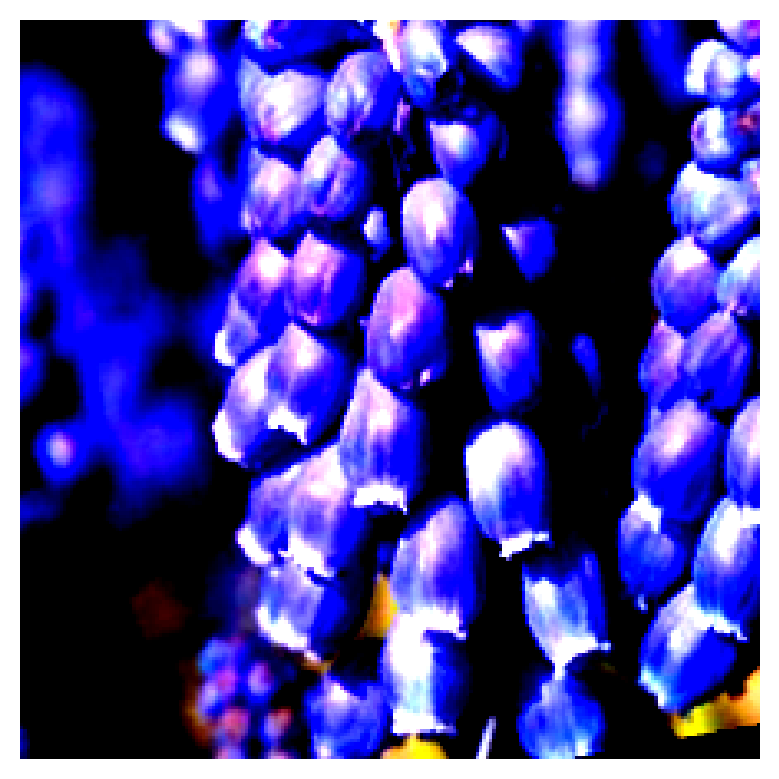

In [3]:
def visualize_batch(train_loader):
    
    # Get one batch of data
    inputs, labels = next(iter(train_loader))

    # Print size of the batch
    print("Batch size:", inputs.size())

    # Get a single image from the batch
    single_image = inputs[0]  # Selecting the first image from the batch

    # Convert the tensor data to numpy array and transpose dimensions
    # (from CxHxW to HxWxC) for visualization
    single_image = np.transpose(single_image.numpy(), (1, 2, 0))

    # Visualize the single image
    plt.imshow(single_image)
    plt.axis('off')  # Turn off axis
    plt.show()

# Call the function to visualize a batch of images
visualize_batch(train_loader)


# Loading and Mapping Category Labels for Image Classification using JSON Data

This Python function, `load_labels`, is designed to load category labels from a JSON file. Here's a breakdown of what each part does:

1. **Function Definition**: It defines a function named `load_labels` which takes one argument:
   - `file_path`: This is a string representing the path to the JSON file containing the category labels.

2. **Loading Labels from JSON File**:
   - The function attempts to open the JSON file specified by `file_path` using a `with` statement.
   - It reads the contents of the file using `json.load(f)` and stores them in the `labels_dict` variable.
   - If the file is not found or if there is an error in decoding the JSON format, appropriate error messages are printed, and `None` is returned.

3. **Handling Errors**: The function includes error handling using `try` and `except` blocks to catch `FileNotFoundError` and `json.JSONDecodeError` exceptions.

4. **Loading Labels**: The function returns the `labels_dict`, which is a dictionary mapping category names to their corresponding labels.

5. **Loading Labels File and Displaying Results**:
   - The path to the labels JSON file is specified in `labels_file_path`.
   - The function `load_labels` is called with `labels_file_path` as the argument to load the category labels.
   - If the loading process is successful (`cat_to_name` is not `None`), the function prints the category labels along with their corresponding numbers.
   - If there is an error during the loading process, an error message is printed.

Overall, this function serves the purpose of loading and mapping category labels from a JSON file, which is crucial for tasks like image classification, where each image is associated with a specific category or class.

In [4]:
def load_labels(file_path):

    try:
        with open(file_path, 'r') as f:
            labels_dict = json.load(f)
        return labels_dict
    except FileNotFoundError:
        print("Error: File not found.")
        return None
    except json.JSONDecodeError:
        print("Error: Invalid JSON format.")
        return None

# Path to the labels JSON file
labels_file_path = '/content/drive/My Drive/Oxford-102-CNN-Classifier/labels.json'

# Load labels from the JSON file
cat_to_name = load_labels(labels_file_path)

if cat_to_name is not None:
    # Print the category names along with their corresponding numbers
    print("Category labels and names:")
    for label, category_name in cat_to_name.items():
        print(f"Label: {label}, Name: {category_name}")
else:
    print("Error: Failed to load labels.")

Category labels and names:
Label: 21, Name: fire lily
Label: 3, Name: canterbury bells
Label: 45, Name: bolero deep blue
Label: 1, Name: pink primrose
Label: 34, Name: mexican aster
Label: 27, Name: prince of wales feathers
Label: 7, Name: moon orchid
Label: 16, Name: globe-flower
Label: 25, Name: grape hyacinth
Label: 26, Name: corn poppy
Label: 79, Name: toad lily
Label: 39, Name: siam tulip
Label: 24, Name: red ginger
Label: 67, Name: spring crocus
Label: 35, Name: alpine sea holly
Label: 32, Name: garden phlox
Label: 10, Name: globe thistle
Label: 6, Name: tiger lily
Label: 93, Name: ball moss
Label: 33, Name: love in the mist
Label: 9, Name: monkshood
Label: 102, Name: blackberry lily
Label: 14, Name: spear thistle
Label: 19, Name: balloon flower
Label: 100, Name: blanket flower
Label: 13, Name: king protea
Label: 49, Name: oxeye daisy
Label: 15, Name: yellow iris
Label: 61, Name: cautleya spicata
Label: 31, Name: carnation
Label: 64, Name: silverbush
Label: 68, Name: bearded iris

In [5]:
model = models.alexnet (pretrained = True)
# print("Loaded Model:", model)

# Updating Classifer in the Network
for param in model.parameters():
    param.requires_grad = False

classifier = nn.Sequential  (OrderedDict ([
                            ('fc1', nn.Linear (9216, 4096)),
                            ('relu1', nn.ReLU ()),
                            ('dropout1', nn.Dropout (p = 0.3)),
                            ('fc2', nn.Linear (4096, 2048)),
                            ('relu2', nn.ReLU ()),
                            ('dropout2', nn.Dropout (p = 0.3)),
                            ('fc3', nn.Linear (2048, 102)),
                            ('output', nn.LogSoftmax (dim =1))
                            ]))
model.classifier = classifier
# print("Model:", model)

# Initializing criterion and optimizer
criterion = nn.NLLLoss ()
optimizer = optim.Adam (model.classifier.parameters (), lr = 0.001)

# Defining validation
def validation(model, valid_loader, criterion):
    model.to ('cuda')

    valid_loss = 0
    accuracy = 0
    for inputs, labels in valid_loader:

        inputs, labels = inputs.to('cuda'), labels.to('cuda')
        output = model.forward(inputs)
        valid_loss += criterion(output, labels).item()

        ps = torch.exp(output)
        equality = (labels.data == ps.max(dim=1)[1])
        accuracy += equality.type(torch.FloatTensor).mean()

    return valid_loss, accuracy

# Training a model

model.to ('cuda')
epochs = 10
print_every = 40
steps = 0

print("Training loop")

# Lists to store metrics
train_losses = []
valid_losses = []
valid_accuracies = []


for e in range (epochs):
    running_loss = 0
    for ii, (inputs, labels) in enumerate (train_loader):
        steps += 1

        inputs, labels = inputs.to('cuda'), labels.to('cuda')

        optimizer.zero_grad () #where optimizer is working on classifier paramters only

        # Forward and backward passes
        outputs = model.forward (inputs) #calculating output
        loss = criterion (outputs, labels) #calculating loss
        loss.backward ()
        optimizer.step () #performs single optimization step

        running_loss += loss.item () # loss.item () returns scalar value of Loss function

        if steps % print_every == 0:
            model.eval () #switching to evaluation mode so that dropout is turned off

            # Turn off gradients for validation, saves memory and computations
            with torch.no_grad():
                valid_loss, accuracy = validation(model, valid_loader, criterion)

            train_losses.append(running_loss / print_every)
            valid_losses.append(valid_loss / len(valid_loader))
            valid_accuracies.append(accuracy / len(valid_loader))

            print("Epoch: {}/{}.. ".format(e+1, epochs),
                  "Training Loss: {:.3f}.. ".format(running_loss/print_every),
                  "Valid Loss: {:.3f}.. ".format(valid_loss/len(valid_loader)),
                  "Valid Accuracy: {:.3f}%".format(accuracy/len(valid_loader)*100))

            running_loss = 0

            # Make sure training is back on
            model.train()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:01<00:00, 147MB/s]


Training loop
Epoch: 1/10..  Training Loss: 4.263..  Valid Loss: 2.495..  Valid Accuracy: 38.947%
Epoch: 1/10..  Training Loss: 2.499..  Valid Loss: 1.520..  Valid Accuracy: 60.111%
Epoch: 2/10..  Training Loss: 0.792..  Valid Loss: 1.198..  Valid Accuracy: 66.495%
Epoch: 2/10..  Training Loss: 1.765..  Valid Loss: 1.087..  Valid Accuracy: 69.341%
Epoch: 2/10..  Training Loss: 1.694..  Valid Loss: 0.980..  Valid Accuracy: 71.471%
Epoch: 3/10..  Training Loss: 1.369..  Valid Loss: 1.007..  Valid Accuracy: 71.212%
Epoch: 3/10..  Training Loss: 1.530..  Valid Loss: 0.802..  Valid Accuracy: 77.582%
Epoch: 4/10..  Training Loss: 0.416..  Valid Loss: 0.853..  Valid Accuracy: 76.024%
Epoch: 4/10..  Training Loss: 1.401..  Valid Loss: 0.801..  Valid Accuracy: 77.327%
Epoch: 4/10..  Training Loss: 1.400..  Valid Loss: 0.746..  Valid Accuracy: 78.563%
Epoch: 5/10..  Training Loss: 0.914..  Valid Loss: 0.664..  Valid Accuracy: 80.486%
Epoch: 5/10..  Training Loss: 1.297..  Valid Loss: 0.716..  Va

# Visualizing Training and Validation Metrics

This code segment plots the training and validation losses, as well as the validation accuracy, to visualize the performance of a machine learning model during training. The first plot displays the training and validation losses over iterations, while the second plot illustrates the validation accuracy over iterations. These visualizations help in assessing the model's learning progress and identifying potential overfitting or underfitting issues.

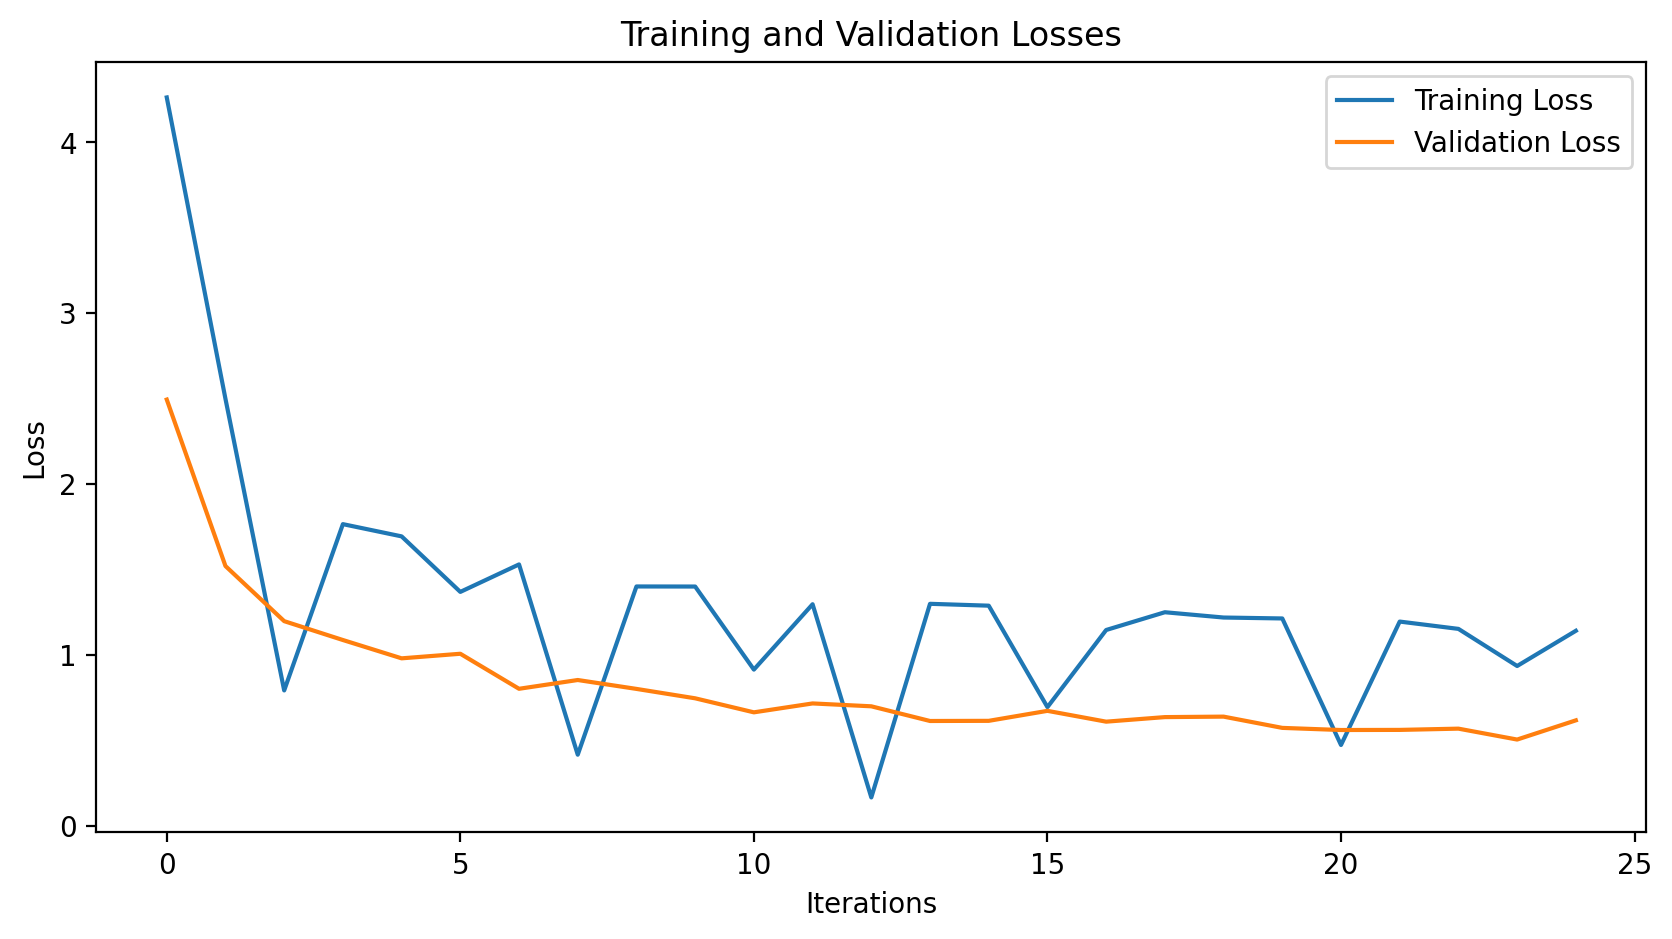

In [6]:
# Plotting training and validation losses
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(valid_losses, label='Validation Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training and Validation Losses')
plt.legend()
plt.show()

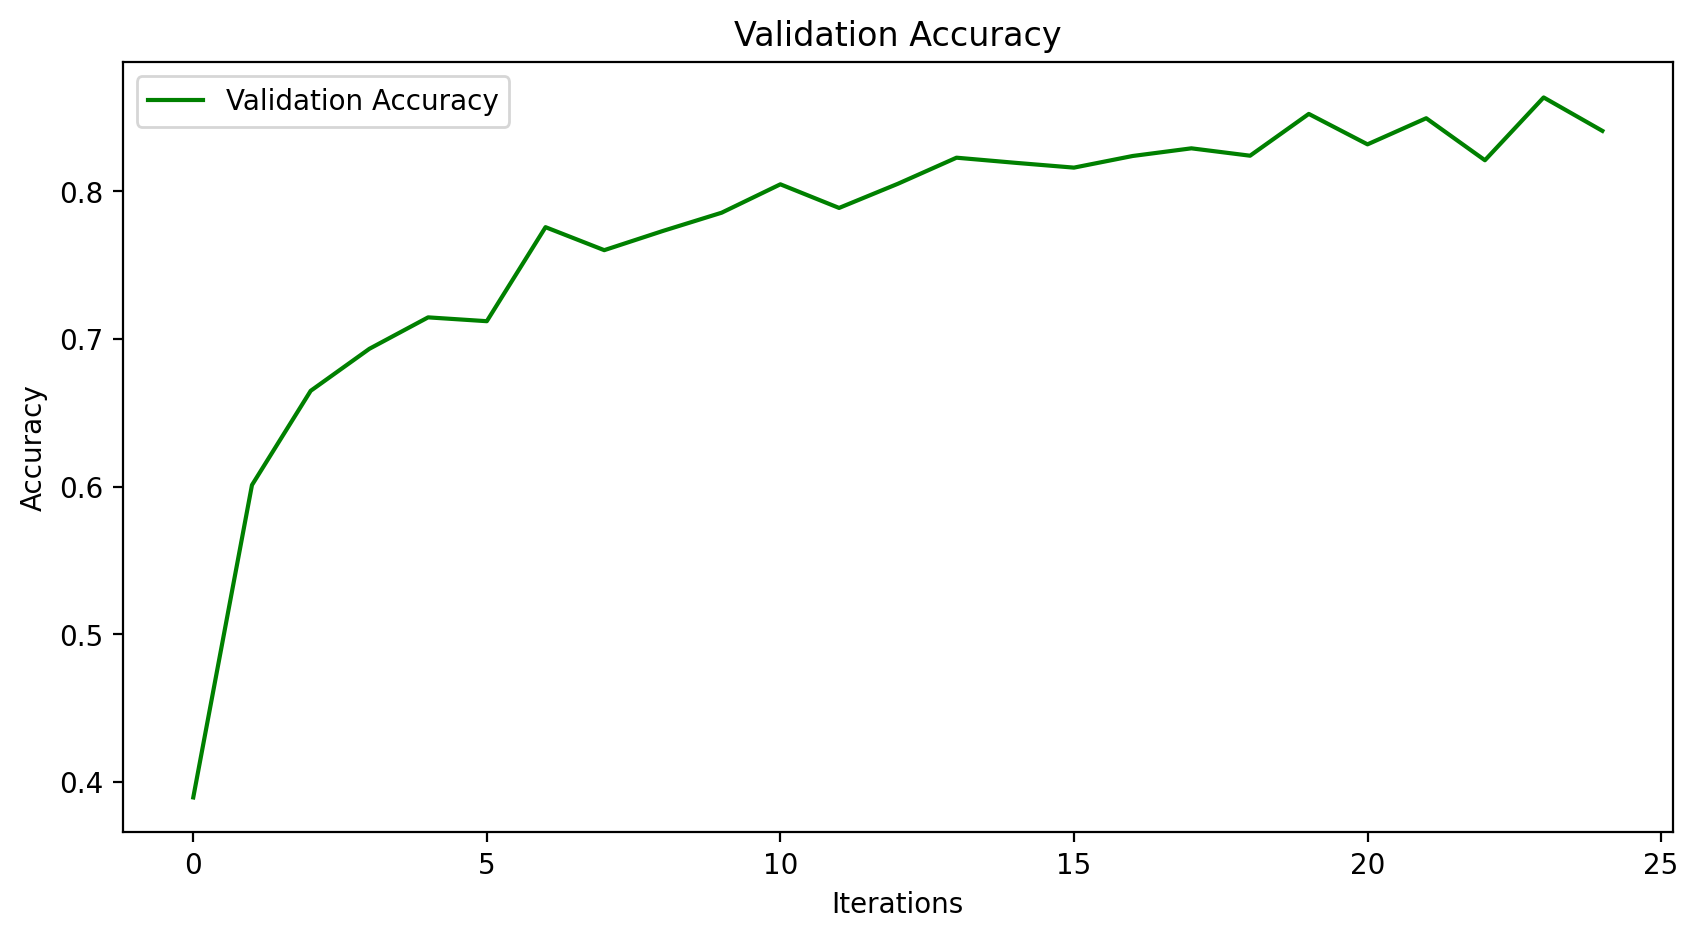

In [7]:
# Plotting validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(valid_accuracies, label='Validation Accuracy', color='green')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy')
plt.legend()
plt.show()

# Assessing Model Performance on Test Set and Visualizing Test Accuracy

This code segment evaluates the performance of a machine learning model on the test set and visualizes the test accuracy. It prints the accuracy of the network on the test images and plots the test accuracy as a bar chart. These actions help in assessing the model's performance on unseen data.

Validation on the test set has been started!
Accuracy of the network on test images: 75.09 %


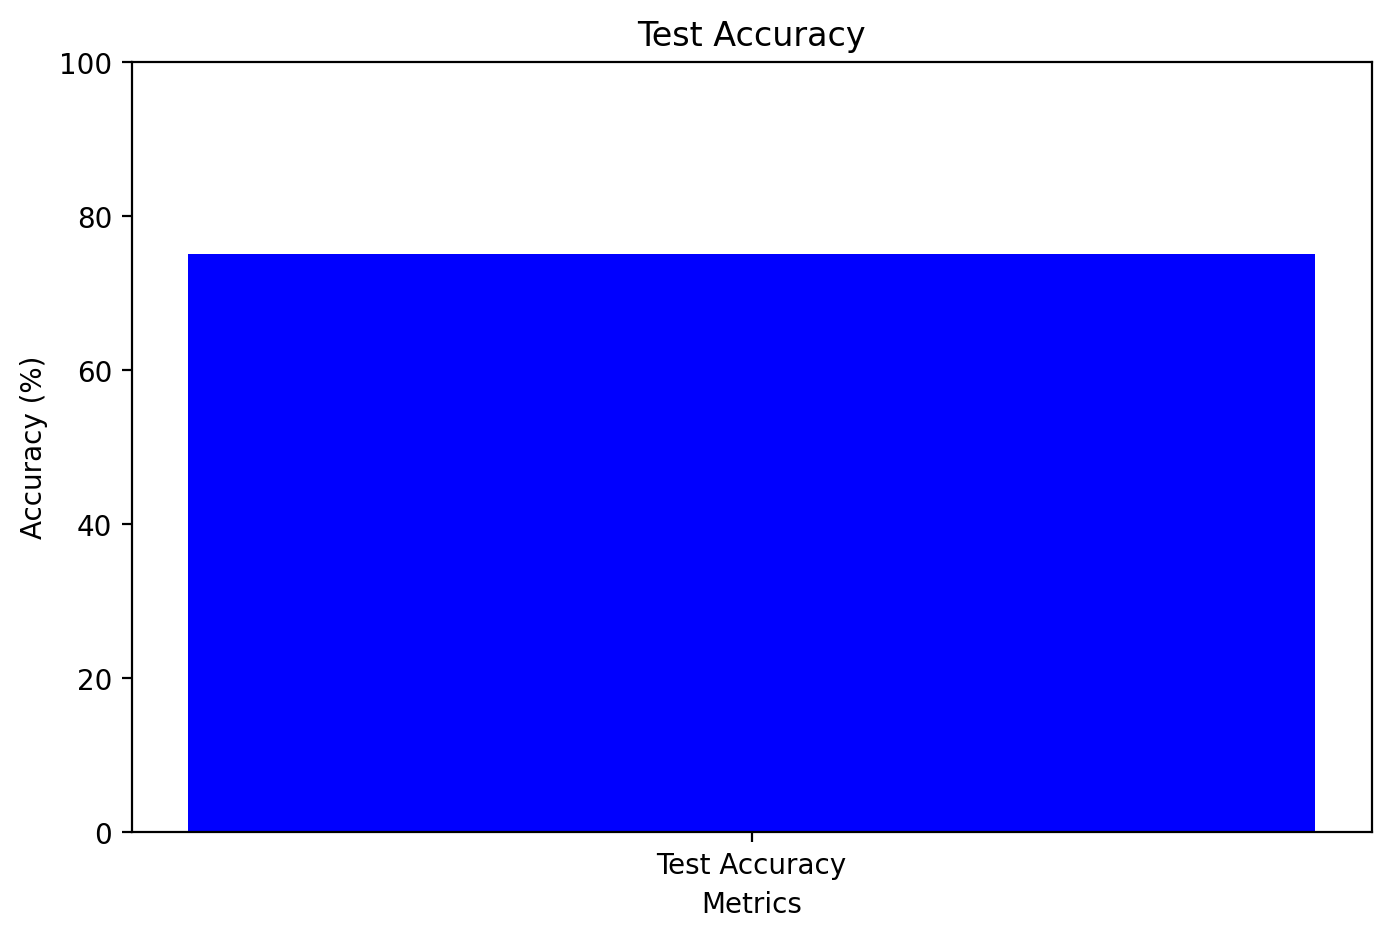

In [8]:
# Validation on the test set
print("Validation on the test set has been started!")

ts_correct = 0
ts_total = 0

with torch.no_grad ():
    for data in test_loader:
        inputs, labels = data
        inputs, labels = inputs.to('cuda'), labels.to('cuda')
        outputs = model (inputs)
        _, predicted = torch.max (outputs.data,1)
        ts_total += labels.size (0)
        ts_correct += (predicted == labels).sum().item()

test_accuracy = 100 * ts_correct / ts_total
print('Accuracy of the network on test images: %.2f %%' % test_accuracy)

# Plotting test accuracy

plt.figure(figsize=(8, 5))
plt.bar(['Test Accuracy'], [test_accuracy], color='blue')
plt.xlabel('Metrics')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy')
plt.ylim(0, 100)
plt.show()

# Saving Model Checkpoint and Mapping for Image Classification

This code snippet performs the following tasks:

1. Moves the model from GPU to CPU since there's no need for GPU usage during saving/loading the model.
2. Assigns the mapping between predicted class and class name from the training dataset to the model.
3. Creates a dictionary containing:
   - `'classifier'`: The classifier part of the model.
   - `'state_dict'`: The state dictionary of the model containing parameters and buffers.
   - `'mapping'`: The mapping between class indices and class names.
4. Specifies the path where the checkpoint will be saved.
5. Saves the checkpoint dictionary containing the model's classifier, state dictionary, and class mapping to the specified path using PyTorch's `torch.save()` function.

This process effectively saves the model's architecture, parameters, and associated mapping for potential future use, such as model retraining, fine-tuning, or deployment.

In [9]:
model.to ('cpu') #no need to use cuda for saving/loading model.
model.class_to_idx = train_image_datasets.class_to_idx #saving mapping between predicted class and class name,
#second variable is a class name in numeric

#creating dictionary
checkpoint = {'classifier': model.classifier,
              'state_dict': model.state_dict (),
              'mapping':    model.class_to_idx
             }
save_path = '/content/drive/My Drive/Oxford-102-CNN-Classifier/project_checkpoint.pth'
torch.save (checkpoint, save_path)

# Loading Model Checkpoint and Rebuilding Model for Inference

This Python function, `load_checkpoint`, serves the purpose of loading a model checkpoint from a specified file path and rebuilding the model. Here's a breakdown of its functionality:

1. **Function Definition**: It defines a function named `load_checkpoint` which takes one argument:
   - `file_path`: A string representing the file path to the checkpoint file.

2. **Loading Checkpoint and Rebuilding Model**:
   - The function loads the checkpoint from the specified file path using `torch.load()`.
   - It rebuilds the model assuming it's an AlexNet architecture. Alternatively, a more generic approach could dynamically choose the model architecture based on information stored in the checkpoint.
   - The classifier part of the model is replaced with the one stored in the checkpoint.
   - The model's state dictionary is loaded from the checkpoint.
   - The mapping between class indices and class names is assigned to the model.
   - Model parameters are frozen to avoid accidental modification during inference.

3. **Returning the Rebuilt Model**: The function returns the rebuilt model.

4. **Example Usage**: An example usage of the function is provided where the model is loaded using a sample checkpoint file path.

This function facilitates the process of loading a pre-trained model checkpoint and reconstructing the model for inference or further training.

In [10]:
def load_checkpoint(file_path):

    checkpoint = torch.load(file_path) 

    # Rebuild the model (assuming it's AlexNet)
    model = models.alexnet(pretrained=True)
    model.classifier = checkpoint['classifier']
    model.load_state_dict(checkpoint['state_dict'])
    model.class_to_idx = checkpoint['mapping']

    # Freeze model parameters to avoid training
    for param in model.parameters():
        param.requires_grad = False

    return model

model_verify = load_checkpoint('/content/drive/My Drive/Oxford-102-CNN-Classifier/models/project_checkpoint.pth')


# Image Preprocessing Pipeline for PyTorch Models

This Python function, `process_image`, performs image preprocessing tasks necessary for a PyTorch model. Here's a breakdown of its functionality:

1. **Function Definition**: It defines a function named `process_image` which takes one argument:
   - `image`: This is the file path of the image to be processed.

2. **Loading and Resizing Image**:
   - The function loads the image using the PIL library's `Image.open()` function.
   - It resizes the image while maintaining its aspect ratio. If the width is greater than the height, it sets the height to 256 and adjusts the width proportionally. Otherwise, it sets the width to 256 and adjusts the height proportionally.

3. **Center Cropping**:
   - After resizing, the function crops a 224x224 section from the center of the image.

4. **Normalization**:
   - The function converts the image into a NumPy array and normalizes the values. It divides each pixel value by 255 to bring the range between 0 and 1.
   - It then subtracts the mean `[0.485, 0.456, 0.406]` and divides by the standard deviation `[0.229, 0.224, 0.225]` to standardize the pixel values.

5. **Transposing**:
   - The function transposes the NumPy array to have the color channel as the first dimension, followed by the height and width.

6. **Returning the Processed Image**:
   - The processed image, represented as a NumPy array, is returned.

This function prepares the image data in a format suitable for input to a PyTorch model, ensuring that it undergoes the necessary transformations such as resizing, cropping, and normalization.

In [11]:
def process_image(image):

    im = Image.open (image) 
    width, height = im.size 

    if width > height:
        height = 256
        im.thumbnail ((50000, height), Image.ANTIALIAS)
    else:
        width = 256
        im.thumbnail ((width,50000), Image.ANTIALIAS)


    width, height = im.size 

    reduce = 224
    left = (width - reduce)/2
    top = (height - reduce)/2
    right = left + 224
    bottom = top + 224
    im = im.crop ((left, top, right, bottom))

    np_image = np.array (im)/255 #to make values from 0 to 1
    np_image -= np.array ([0.485, 0.456, 0.406])
    np_image /= np.array ([0.229, 0.224, 0.225])
    np_image= np_image.transpose ((2,0,1))

    return np_image

# Image Preprocessing and Visualization for PyTorch Models

This code segment defines functions to preprocess and display images for a PyTorch model. Here's a breakdown of its functionality:

1. **Defining Dataset Directories**: Three directories are defined, namely `train_dir`, `valid_dir`, and `test_dir`, each pointing to their respective locations in the Google Drive where the training, validation, and test datasets are stored.

2. **Image Processing Function (`process_image`)**:
   - This function takes an image path as input.
   - It loads the image using PIL's `Image.open()` function.
   - Defines a series of transformations using `torchvision.transforms.Compose`, including resizing, center cropping, converting to tensor, and normalization.
   - Applies these transformations to the image and returns the resulting tensor.

3. **Image Display Function (`imshow`)**:
   - This function displays a PyTorch tensor as an image.
   - It takes the tensor, an optional axis (`ax`), and an optional title (`title`) as input.
   - Transforms the tensor back to a NumPy array, undoing the normalization.
   - Clips the pixel values to the range [0, 1] to ensure valid image display.
   - Displays the image using Matplotlib's `imshow()` function.
   
4. **Example Usage**:
   - An example usage of the `process_image` function is provided where an image is loaded, processed, and displayed using the `imshow` function.

Overall, these functions streamline the preprocessing and visualization of images, making them suitable for input to a PyTorch model.

<Axes: >

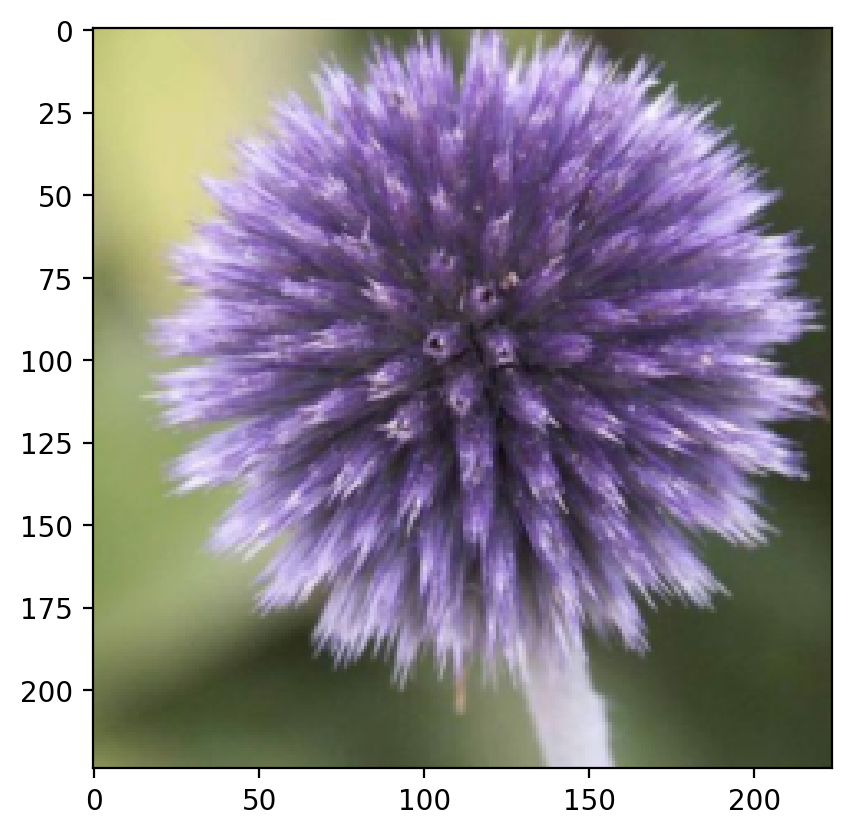

In [12]:
# Define the paths to the directories containing the datasets
train_dir = '/content/drive/My Drive/Oxford-102-CNN-Classifier/dataset/train/'
valid_dir = '/content/drive/My Drive/Oxford-102-CNN-Classifier/dataset/valid/'
test_dir = '/content/drive/My Drive/Oxford-102-CNN-Classifier/dataset/test/'

def process_image(image_path):
    """ Process an image path into a PyTorch tensor """
    img = Image.open(image_path)
    preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    # Apply transformations
    img_tensor = preprocess(img)
    return img_tensor

def imshow(image, ax=None, title=None):
    """ Imshow for PyTorch tensors """
    if ax is None:
        fig, ax = plt.subplots()

    image = image.numpy().transpose((1, 2, 0))

    # Undo preprocessing
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean
    image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.axis('on')
    return ax

image_path = '/content/drive/My Drive/Oxford-102-CNN-Classifier/dataset/train/10/image_07086.jpg'
img = process_image(image_path)
imshow(img)


# Example Image Processing and Display

This script is designed to process and display images for a convolutional neural network (CNN) classifier trained on the Oxford-102 dataset.

First, it defines paths to the directories containing the training, validation, and test datasets. These paths are stored in variables `train_dir`, `valid_dir`, and `test_dir`, respectively.

Two functions are then defined:

1. `process_image(image_path)`: This function takes an image file path as input and processes the image into a PyTorch tensor suitable for input into a CNN. It performs several transformations on the image, including resizing to 256x256 pixels, center cropping to 224x224 pixels (to match the input size expected by many CNN models), converting the image to a tensor, and normalizing its pixel values using predefined mean and standard deviation values.

2. `imshow(image, ax=None, title=None)`: This function displays a PyTorch tensor as an image. It takes the image tensor (`image`) as input and optionally accepts an axis (`ax`) for plotting and a title (`title`). It undoes the normalization performed during image processing, transposes the tensor to the correct dimensions expected by matplotlib, clips the pixel values to the range [0, 1], and displays the image using matplotlib.

The example usage at the end of the script demonstrates how to use these functions to load and display an image from the training dataset (`image_path`). The image is processed using `process_image()` and then displayed using `imshow()`.

In [13]:
# Function to predict the class (or classes) of an image using a trained deep learning model
def predict(image_path, model, topkl):

    image = process_image(image_path)

    image = image.unsqueeze(0)

    model.eval()

    output = model(image)

    probs, indices = torch.topk(torch.softmax(output, dim=1), topkl)

    idx_to_class = {val: key for key, val in model.class_to_idx.items()}
    classes = [idx_to_class[idx.item()] for idx in indices[0]]

    probs = probs.detach().numpy().tolist()[0]

    return probs, classes

# Displaying Image with Top 5 Predicted Classes

This script segment aims to display an image along with the top 5 predicted classes from a pre-trained convolutional neural network (CNN) model. Here's a breakdown:

1. **Model Loading**: The variable `model_verify` seems to hold a pre-trained CNN model, presumably for image classification. It's assigned to the `model` variable for further use.

2. **Image Selection**: An image file path is chosen for demonstration. In this case, the file path corresponds to an image from the test set of the Oxford-102 dataset. The example file path selected is `'/content/drive/My Drive/Oxford-102-CNN-Classifier/dataset/test/10/image_07090.jpg'`.

3. **Image Processing**: The selected image is processed using the `process_image()` function, presumably defined elsewhere in the code. This function transforms the image into a format suitable for input into the CNN model.

4. **Image Display**: The processed image is then displayed using the `imshow()` function, which presumably shows the image using matplotlib.

5. **Displaying the Result**: Finally, the image along with the top 5 predicted classes is displayed. However, the code for displaying the top 5 classes is not provided in the snippet.

To complete the functionality, you'd need to run inference on the processed image using the `model`, retrieve the top 5 predicted classes, and display them alongside the image.

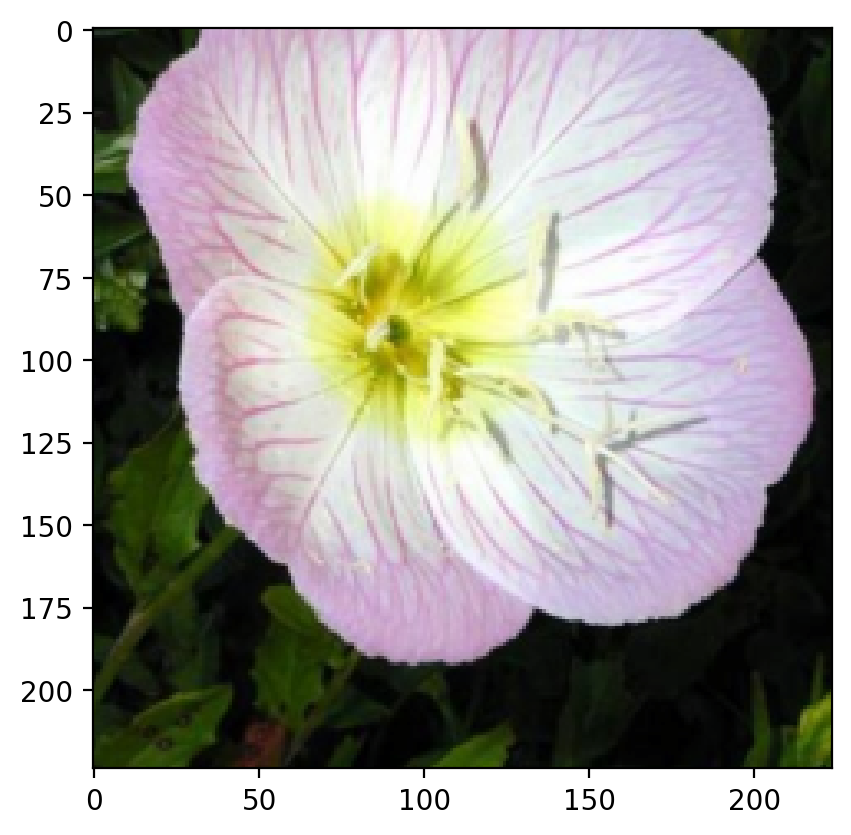

In [26]:
model = model_verify

image_path = '/content/drive/My Drive/Oxford-102-CNN-Classifier/dataset/train/1/image_06734.jpg'
file_path = '/content/drive/My Drive/Oxford-102-CNN-Classifier/dataset/test/1/image_06743.jpg'

img = process_image (file_path)
imshow (img)
plt.show()

# Visualizing Top 5 Predicted Classes with Probabilities

This script segment appears to make predictions using a pre-trained model on an image file, and then visualizes the top 5 predicted classes along with their probabilities in a bar plot. Here's a description:

1. **Prediction**: The `predict()` function is invoked with parameters `file_path`, `model`, and `5`, which presumably means it predicts the top 5 classes for the image located at the provided file path using the specified model.

2. **Class Name Conversion**: The predicted classes are converted into their corresponding class names using a dictionary or mapping called `cat_to_name`.

3. **Bar Plot Visualization**: The predicted probabilities (`probs`) and class names (`class_names`) are used to create a bar plot using the seaborn library (`sns`). The predicted class names are plotted on the y-axis, and their corresponding probabilities are plotted on the x-axis.

4. **Plot Display**: Finally, the bar plot is displayed using `plt.show()`.

Overall, this script segment is a concise way to visualize the predicted classes and their probabilities for a given image.

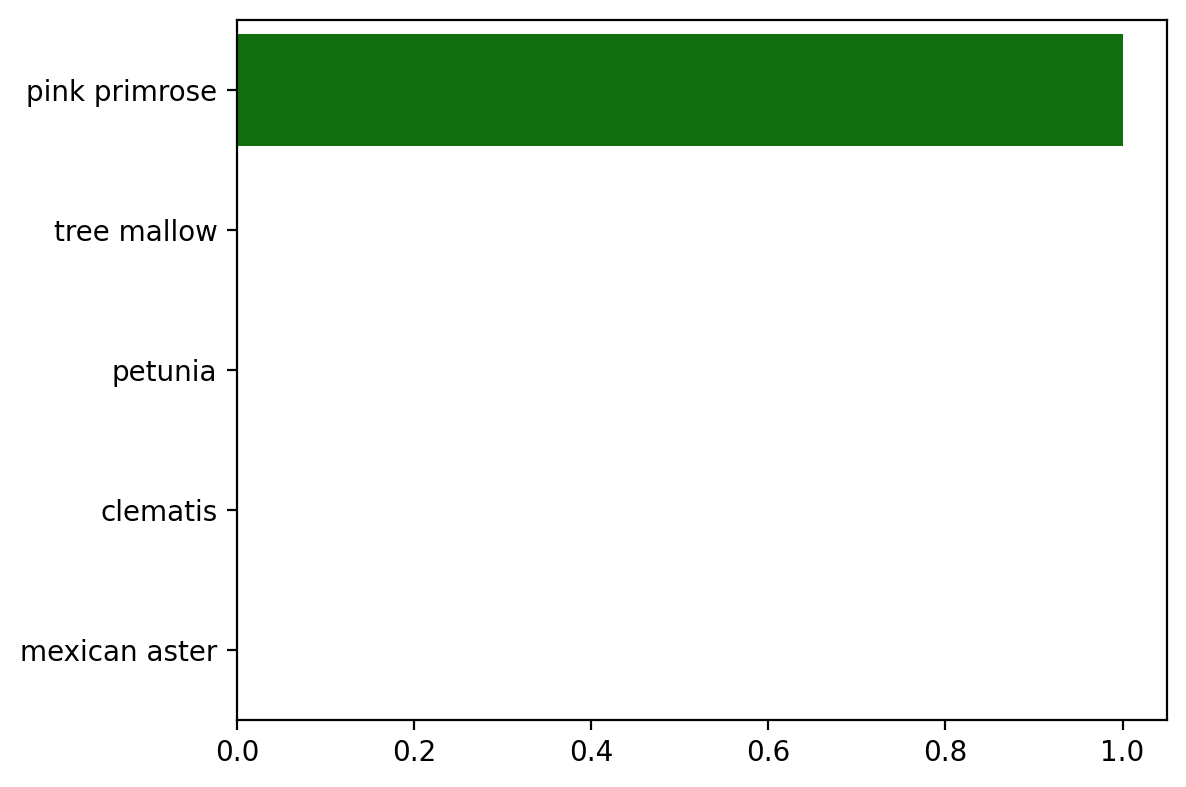

In [27]:
probs, classes = predict (file_path, model, 5)

class_names = [cat_to_name [item] for item in classes]
plt.figure(figsize = (6,10))
plt.subplot(2,1,2)

sns.barplot(x=probs, y=class_names, color= 'green');
plt.show()